In [46]:
import numpy as np
from process import wrappers
import matplotlib.pyplot as plt

Before starting, please ensure that betashape is installed as described in README.md 

I will assume that betashape folder is located in *beta_path* and the output files will be saved in *out_path*

All the information and manuals about betashape can be found in (http://www.lnhb.fr/home/rd-activities/spectrum-processing-software/)

# Execute BetaShape with an ensdf file

First, download a suitable input file.

You can use one from the following database (https://www.nndc.bnl.gov/ensdf/).
Select B- decay and download selecting "ENSDF text format". The file will be in .txt file. 

If you download a file for just one nuclide, rename it with the extension *.ensdf

If you download multiple nuclide in a single .txt file (e.g. *example.txt*), you can unpack them into separate files using the script unpackENSDF.py (unpackENSDF.py -f example.txt -o out_path)

In [47]:
beta_path = ""
out_path = ""

#Initialize the object
CmdBetashape = wrappers.CmdBetaShape()
CmdBetashape.set_betashape(beta_path)
CmdBetashape.set_save_path(out_path)

In [54]:
# the .ensdf input file is located in ensdf_path and has a name dummy.ensdf
ensdf_path = ""
ensdf_name = "101RB.ensdf"

# Evaluate_decay execute betashape with the specified options (boptions).
# myEstep and nu are always required.
# If you want to see the true output files for betashape, you can select rmdir=False. 
# In out_path "dummyFolder101" will be present and will have all the betashape output files.
# If you want to execute evaluate_decay again, you must remove "dummyFolder101" first.

result_dic = CmdBetashape.evaluate_decay(ensdf_path=ensdf_path, ensdf_name=ensdf_name,
                                         boptions="myEstep=1 nu=1",rmdir=True)

Betashape output is saved as a dictionary *result_dic*. 

The key of the dictionary represents the metastable state (0 -> non-metastable, 1 -> first metastable and so on...)

After selecting the metastable state, the output is divided into a list of dictionary. Each dictionary contains  information about the different levels of the decay:

- **labels:** The column header for the data_beta and data_nu matrix
- **data_beta:** A Data matrix with the energy spectrum of the selected level for electrons
- **data_nu:** A Data matrix with the energy spectrum of the selected level for neutrinos
- **output_message:** The betashape output message for the selected level    

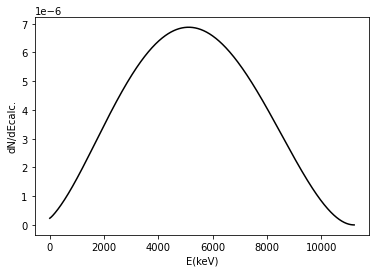

---------------------------------------------------------------------------------------------

BetaShape
Version: 2.4 (06/2024)
Author: X. Mougeot (xavier.mougeot@cea.fr)
CEA, LIST, Laboratoire National Henri Becquerel (LNHB), Gif-sur-Yvette F-91191, France
Please cite: [2023MO21] X. Mougeot, Applied Radiation and Isotopes 201, 111018 (2023)

---------------------------------------------------------------------------------------------

Parent nucleus: 37-Rb-101 [3/2+] g.s.  -->  Daughter nucleus: 38-Sr-101 [**] 595.9 (13) keV
This transition from the beta - decay of Rb-101 is calculated as allowed.

Numerical screening correction is considered.
Radiative correction is considered.
Atomic exchange correction is considered.
Atomic overlap correction is considered.

End-point energy: 1.121E4 (11) keV     Energy step: 37 keV     Intensity: 0.04314

No tabulated experimental shape factor for this transition!

Input mean energy: 5.22E3 (5) keV
Mean energy from the calculated spectrum: 5.21E3 

In [49]:
#=============================================
# Example: plot the first level of the first transition and print all its information
#=============================================
transition = result_dic[0][0]

plt.plot(transition["data_beta"][:,0],transition["data_beta"][:,1],c='k')
plt.xlabel(transition["label"][0])
plt.ylabel(transition["label"][1])
plt.show()

for line in transition["output_message"]:
    print(line)

*result_dic* can be re-arranged into a more convenient format using *convert_output_into_dic*

After selecting the metastable state, the output will be a single dictionary with all the relevant information:

- **transition_Emax:** ndarray with the maximum energy in keV for the transitions
- **transition_intensity:** ndarray with the intensity of the transition
- **transition_dN_dE:** ndarray with the transition spectra. The i-th row corresponds to the i-th entry of the arrays
- **transition_unc_dN_dE:** ndarray with the uncertanties associated with the spectra
- **transition_unc_intensity:** ndarray with the uncertanties associated with the intensity of the levels in shorthand notation (sorry).
- **dN_dE_tot:** ndarray with the full electron(neutrino) spectrum
- **unc_dN_dE** ndarray with the uncertanty associated with dN_dE_tot
- **transition_type:** ndarray with type of transition. "a" for allowed, "1u" for first-forbidden unique, "1nu" for first-forbidden non-unique, and so on.

In [50]:
# select tipo = "data_nu"("data_beta") for neutrino(electron) spectra.

simple_dic = CmdBetashape.convert_output_into_dic(result_dic[0], tipo = "data_beta")

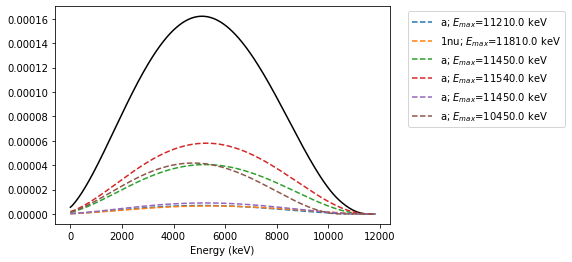

In [51]:
#=============================================
# Example: plot all the levels
#=============================================
E_step = 1 # energy step in keV

energy = np.arange(0,len(simple_dic["dN_dE_tot"]))*E_step

plt.plot(energy,simple_dic["dN_dE_tot"],c='k')
for i in range(simple_dic["transition_dN_dE"].shape[0]):
    label = simple_dic["transition_type"][i] + "; " + r"$E_{max}$="+str(simple_dic["transition_Emax"][i]) + " keV"
    plt.plot(energy,simple_dic["transition_dN_dE"][i,:],"--",label=label)
    
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.xlabel("Energy (keV)")
plt.show()

# Execute BetaShape with a custom input

In [55]:
beta_path = ""
out_path = ""

#Initialize the object
CmdBetashape = wrappers.CmdBetaShape()
CmdBetashape.set_betashape(beta_path)
CmdBetashape.set_save_path(out_path)

By default betashape will run only on ensdf files.

However, with CmdBetashape, you process also python dictionaries, as long as they follows the required syntax.

An example dictionary describing the transition from 12B to 12C with a single level can be obtained using *get_example_dictionary*

Dictionary structure:

- **P:** string ; parent name
- **D:** string ; daughter name
- **E_P:** float ; energy of the parent level, in keV
- **dE_P:** string ; shorthand uncertanties for the parent energy level. 2 digits max.
- **JP_P:** string ; Spin parity of the parent
- **half_file, half_life_units, dhalf_life:** not actually used for evaluating the decay (?)
- **Q:** float ; Q-value of the decay, in keV
- **dQ:** float ; shorthand uncertanties for Q value. 2 digits max.
- **BR:** float ; normalization factor for the total spectrum
- **E_D:** list of float ; energy of the daughter levels, in keV
- **dE_D:** list of string ; shorthand uncertanties for the energy of the levels, in keV
- **JP_D:** string ; spin parity of the daughter
- **IB:** list of float ; branching ratios of the transitions, in %
- **d_IB:** list of float ; shorthand uncertanties for the BRs, 2 digits max.

In [93]:
example_dic =CmdBetashape.get_example_dictionary()
for key, value in example_dic.items():
    print(key , ":", value)

P : 12B
D : 12C
E_P : 0.0
dE_P : 
JP_P : 1+
half_life : 20.2
half_life_units : MS
dhalf_life : 2
Q : 13369.4
dQ : 13
NR : 1.0
dNR : 
BR : 1
dBR : 
E_D : [0]
dE_D : ['']
JP_D : ['0+']
L : 
IB : [98.216]
d_IB : [28]
trans_type : 


You can process this dictionary using the following code. 

Refer to the previous section for the details on *evaluate_decay* and *convert_output_into_dic* methods

In [63]:
result_dic = CmdBetashape.evaluate_decay(dictionary=example_dic,
                                         boptions="myEstep=0.5 nu=1",rmdir=True)

In [64]:
simple_dic = CmdBetashape.convert_output_into_dic(result_dic[0], tipo = "data_beta")

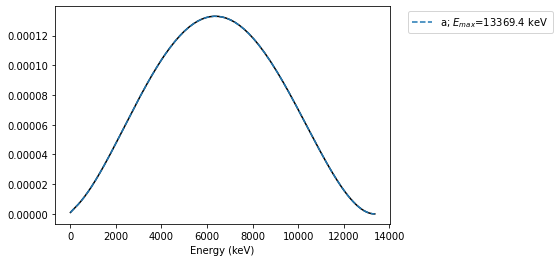

In [79]:
#=============================================
# Example: plot all the levels
#=============================================
E_step = 0.5 # energy step in keV

energy = np.arange(0,len(simple_dic["dN_dE_tot"]))*E_step

plt.plot(energy,simple_dic["dN_dE_tot"],c='k')
for i in range(simple_dic["transition_dN_dE"].shape[0]):
    label = simple_dic["transition_type"][i] + "; " + r"$E_{max}$="+str(simple_dic["transition_Emax"][i]) + " keV"
    plt.plot(energy,simple_dic["transition_dN_dE"][i,:],"--",label=label)
    
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.xlabel("Energy (keV)")
plt.show()

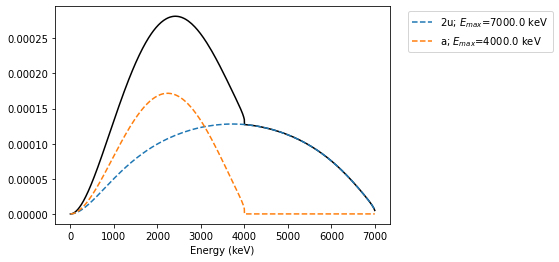

In [92]:
#=============================================
# Example: let's create the neutrino spectrum for the fake decay 12B->12C with two levels:
# level 1: endpoint energy 4000, BR = 40%, allowed transition
# level 2: endpoint energy 7000, BR = 60%, 2 forbidden unique transition
#=============================================
example_dic =CmdBetashape.get_example_dictionary()

example_dic["Q"] = 7000
example_dic["dQ"] = 0
example_dic["JP_P"] = "0+"
example_dic["JP_D"] = ["0+","3+"]
example_dic["E_D"] = example_dic["Q"]- np.array([4000,7000])
example_dic["dE_D"] = [0,0]
example_dic["IB"] = [40,60]
example_dic["d_IB"] = [0,0]



result_dic = CmdBetashape.evaluate_decay(dictionary=example_dic,
                                         boptions="myEstep=0.5 nu=1",rmdir=True)

simple_dic = CmdBetashape.convert_output_into_dic(result_dic[0], tipo = "data_nu")

E_step = 0.5 # energy step in keV

energy = np.arange(0,len(simple_dic["dN_dE_tot"]))*E_step

plt.plot(energy,simple_dic["dN_dE_tot"],c='k')
for i in range(simple_dic["transition_dN_dE"].shape[0]):
    label = simple_dic["transition_type"][i] + "; " + r"$E_{max}$="+str(simple_dic["transition_Emax"][i]) + " keV"
    plt.plot(energy,simple_dic["transition_dN_dE"][i,:],"--",label=label)
    
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.xlabel("Energy (keV)")
plt.show()